# The purpose of this project is to determine sentiments from sentences of an Imdb dataset

## tool used for data visualization: pandas

## tool used for data preprocessing : CountVectorizer method used for feature extraction from the provided dataset

## model used for prediction: Many different models are used to determine the accuracy difference among them and find the most efficient one

## tools used for data validation: the loss of the model was determined by binary cross entropy and the accruacry was measured by accuracy metrics



**Data Loading**

In [1]:
def download_data_from_UCI():
  !rm -rf 'sentiment labelled sentences'
  !rm -rf 'sentiment labelled sentences.zip'
  !rm -rf '__MACOSX'
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
  !unzip 'sentiment labelled sentences.zip'

download_data_from_UCI()

--2020-11-11 20:19:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘sentiment labelled sentences.zip’

sentiment labelled  100%[===================>]  82.21K  --.-KB/s    in 0.1s    

2020-11-11 20:19:22 (796 KB/s) - ‘sentiment labelled sentences.zip’ saved [84188/84188]

Archive:  sentiment labelled sentences.zip
   creating: sentiment labelled sentences/
  inflating: sentiment labelled sentences/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/sentiment labelled sentences/
  inflating: __MACOSX/sentiment labelled sentences/._.DS_Store  
  inflating: sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/imdb_labelle

In [2]:
!ls 'sentiment labelled sentences'/

amazon_cells_labelled.txt  imdb_labelled.txt  readme.txt  yelp_labelled.txt


In [3]:
!head 'sentiment labelled sentences'/imdb_labelled.txt

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  	0
Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  	0
Very little music or anything to speak of.  	0
The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  	1
The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  	0
Wasted two hours.  	0
Saw the movie today and thought it was a good effort, good messages for kids.  	1
A bit predictable.  	0
Loved the casting of Jimmy Buffet as the science teacher.  	1


In [4]:
import pandas as pd
imdb_df = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', names=['sentence', 'label'], sep='\t')
imdb_df

,sentence,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


**Application of Machine Learning on Imdb dataset**

In [5]:
from sklearn.model_selection import train_test_split

imdb_sentences = imdb_df['sentence'].values
imdb_y = imdb_df['label'].values

imdb_sentences_train, imdb_sentences_test, imdb_y_train, imdb_y_test = train_test_split(imdb_sentences, imdb_y, test_size=0.25, random_state=42)
print("Imdb Training sentense shape", imdb_sentences_train.shape)
print("Imdb Testing sentense shape", imdb_sentences_test.shape)
print("Imdb y_data matrix shape", imdb_y_train.shape)
print("Imdb y_test matrix shape", imdb_y_test.shape)
print("Imdb sentences_train: ",imdb_sentences_train[0:10])
print("Imdb y_train: ",imdb_y_train)

Imdb Training sentense shape (561,)
Imdb Testing sentense shape (187,)
Imdb y_data matrix shape (561,)
Imdb y_test matrix shape (187,)
Imdb sentences_train:  ['Give this one a look.  '
 'In fact, this stinker smells like a direct-to-video release.  '
 'Every single character was hilarious and deserved to be called a lead.  '
 'This movie does an excellent job of revealing the complexity of the task and the incredible challenges facing South Africa.  '
 'there are so many problems i dont know where to start.  '
 'Judith Light is one of my favorite actresses and I think she does a superb job in this film!  '
 'This movie now joins Revenge of the Boogeyman and Zombiez as part of the hellish trinity of horror films.  '
 "You can't relate with them, hell you barely can understand them.  "
 'The movie was so boring, that I sometimes found myself occupied peaking in the paper instead of watching (never happened during a Columbo movie before!  '
 'The stories were as unbelievable as the actors

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer =  CountVectorizer(min_df=0, lowercase=False,stop_words='english') # will also remove punctuation or stop words
vectorizer.fit(imdb_sentences_train)

Imdb_X_train = vectorizer.transform(imdb_sentences_train).toarray()
Imdb_X_test  = vectorizer.transform(imdb_sentences_test).toarray()

print("Training matrix shape", Imdb_X_train.shape)
print("Testing matrix shape", Imdb_X_test.shape)
print("Vocabulary: ",vectorizer.vocabulary_)
print("Vocabulary words: ",vectorizer.vocabulary_.keys())
print("Vocabulary index: ",vectorizer.vocabulary_.values())
print(Imdb_X_train)

Training matrix shape (561, 2410)
Testing matrix shape (187, 2410)
Vocabulary:  {'Give': 229, 'look': 1521, 'In': 282, 'fact': 1156, 'stinker': 2076, 'smells': 2025, 'like': 1500, 'direct': 1004, 'video': 2310, 'release': 1867, 'Every': 179, 'single': 2005, 'character': 819, 'hilarious': 1341, 'deserved': 983, 'called': 784, 'lead': 1482, 'This': 525, 'movie': 1612, 'does': 1030, 'excellent': 1129, 'job': 1438, 'revealing': 1896, 'complexity': 883, 'task': 2147, 'incredible': 1399, 'challenges': 814, 'facing': 1155, 'South': 482, 'Africa': 37, 'problems': 1790, 'dont': 1037, 'know': 1461, 'start': 2067, 'Judith': 304, 'Light': 335, 'favorite': 1183, 'actresses': 616, 'think': 2178, 'superb': 2115, 'film': 1196, 'joins': 1440, 'Revenge': 439, 'Boogeyman': 85, 'Zombiez': 596, 'hellish': 1331, 'trinity': 2224, 'horror': 1360, 'films': 1198, 'You': 594, 'relate': 1860, 'hell': 1330, 'barely': 711, 'understand': 2258, 'The': 518, 'boring': 755, 'occupied': 1659, 'peaking': 1708, 'paper': 16

**Applying Logistic Regression**

In [7]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression()
logistic_classifier.fit(Imdb_X_train, imdb_y_train)
score = logistic_classifier.score(Imdb_X_test, imdb_y_test)
print("Accuracy of Imdb logistic model:", score)

Accuracy of Imdb logistic model: 0.7486631016042781


**Applying Neural Network**

In [8]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dropout,Activation
from keras.layers import BatchNormalization,Dense
from keras.regularizers import l2
from keras import initializers,Sequential
import numpy as np
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]

def build_model(n_layers = 2, n_neurons = 1000,initializer='uniform'):
  
  if initializer == 'uniform':
    w_in = np.sqrt(0.001)
    initializer = initializers.RandomUniform(minval=-w_in, maxval=w_in)
  else:
    #https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotNormal
    initializer = initializers.glorot_normal()
  
  model = Sequential() # create Sequential model
  for i in range(n_layers-1):
      model.add(Dense(n_neurons, kernel_initializer=initializer))
      model.add(BatchNormalization()) ## add batch normalization before activation
      model.add(Activation('relu'))
      model.add(Dropout(0.2))
  model.add(Dense(1, activation = 'sigmoid', kernel_initializer=initializer)) 
  return model

imdb_model = build_model(n_layers = 1, n_neurons = 10,initializer='uniform')
imdb_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

train_history_imdb = imdb_model.fit(Imdb_X_train,imdb_y_train, validation_split=0.1, batch_size = 5, epochs = 50, callbacks=keras_callbacks)

Epoch 1/50
101/101 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5377 - val_loss: 0.6861 - val_accuracy: 0.5965
Epoch 2/50
101/101 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.8333 - val_loss: 0.6734 - val_accuracy: 0.7018
Epoch 3/50
101/101 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.9127 - val_loss: 0.6675 - val_accuracy: 0.6667
Epoch 4/50
101/101 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.9365 - val_loss: 0.6556 - val_accuracy: 0.6842
Epoch 5/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5842 - accuracy: 0.9464 - val_loss: 0.6458 - val_accuracy: 0.7018
Epoch 6/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.9544 - val_loss: 0.6427 - val_accuracy: 0.7368
Epoch 7/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.9623 - val_loss: 0.6331 - val_accuracy: 0.7544
Epoch 

In [9]:
print("Accuracy of Imdb neural network model:", imdb_model.evaluate(Imdb_X_test, imdb_y_test)[1])

6/6 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.7433
Accuracy of Imdb neural network model: 0.7433155179023743


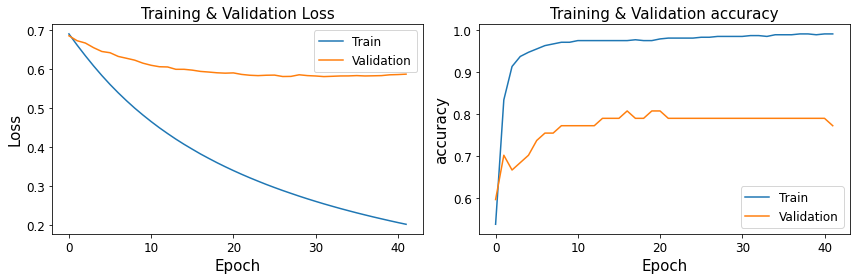

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history_imdb.history['loss'], label='Train')
plt.plot(train_history_imdb.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)


plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history_imdb.history['accuracy'], label='Train')
plt.plot(train_history_imdb.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()

**Word Embedding: Rerepresent each word as a vector.**

In [11]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(imdb_sentences_train[0:5])

Imdb_X_train = tokenizer.texts_to_sequences(imdb_sentences_train[0:5])
print(imdb_sentences_train[0:5])
print(Imdb_X_train)

print("Word frequency: ")
tokenizer.word_index

['Give this one a look.  '
 'In fact, this stinker smells like a direct-to-video release.  '
 'Every single character was hilarious and deserved to be called a lead.  '
 'This movie does an excellent job of revealing the complexity of the task and the incredible challenges facing South Africa.  '
 'there are so many problems i dont know where to start.  ']
[[7, 1, 8, 2, 9], [10, 11, 1, 12, 13, 14, 2, 15, 3, 16, 17], [18, 19, 20, 21, 22, 5, 23, 3, 24, 25, 2, 26], [1, 27, 28, 29, 30, 31, 6, 32, 4, 33, 6, 4, 34, 5, 4, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 3, 49]]
Word frequency: 


{'a': 2,
 'africa': 39,
 'an': 29,
 'and': 5,
 'are': 41,
 'be': 24,
 'called': 25,
 'challenges': 36,
 'character': 20,
 'complexity': 33,
 'deserved': 23,
 'direct': 15,
 'does': 28,
 'dont': 46,
 'every': 18,
 'excellent': 30,
 'facing': 37,
 'fact': 11,
 'give': 7,
 'hilarious': 22,
 'i': 45,
 'in': 10,
 'incredible': 35,
 'job': 31,
 'know': 47,
 'lead': 26,
 'like': 14,
 'look': 9,
 'many': 43,
 'movie': 27,
 'of': 6,
 'one': 8,
 'problems': 44,
 'release': 17,
 'revealing': 32,
 'single': 19,
 'smells': 13,
 'so': 42,
 'south': 38,
 'start': 49,
 'stinker': 12,
 'task': 34,
 'the': 4,
 'there': 40,
 'this': 1,
 'to': 3,
 'video': 16,
 'was': 21,
 'where': 48}

**Padding sequences to the same length**

In [12]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100  # specify how long the sequences should be. This cuts sequences that exceed that number.
Imdb_X_train_pad = pad_sequences(Imdb_X_train, padding='post', maxlen=maxlen)
Imdb_X_test_pad = pad_sequences(Imdb_X_test, padding='post', maxlen=maxlen)

Imdb_X_train_pad

array([[ 7,  1,  8,  2,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [10, 11,  1, 12, 13, 14,  2, 15,  3, 16, 17,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [18, 19, 20, 21, 22,  5, 23,  3, 24, 25,  2, 26,  0,  0,  0,  0,
         0,  0

In [13]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(imdb_sentences_train)

Imdb_X_train = tokenizer.texts_to_sequences(imdb_sentences_train)
Imdb_X_test = tokenizer.texts_to_sequences(imdb_sentences_test)
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
Imdb_X_train_pad = pad_sequences(Imdb_X_train, padding='post', maxlen=maxlen)
Imdb_X_test_pad = pad_sequences(Imdb_X_test, padding='post', maxlen=maxlen)
Imdb_X_train_pad

array([[165,   6,  23, ...,   0,   0,   0],
       [ 10, 218,   6, ...,   0,   0,   0],
       [104, 321,  75, ...,   0,   0,   0],
       ...,
       [  7, 675,  78, ...,   0,   0,   0],
       [  7, 118,  14, ...,   0,   0,   0],
       [  7, 100, 105, ...,   0,   0,   0]], dtype=int32)

**Feature generation option : one-hot encoding**

In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,handle_unknown = 'ignore')

all_labels = Imdb_X_train_pad.reshape(-1,)
all_labels
enc.fit(all_labels.reshape(len(all_labels),1))  

Imdb_X_train_pad_onehot = []
for sentence in Imdb_X_train_pad:
    Imdb_X_train_pad_onehot.append(enc.transform(sentence.reshape(maxlen,1)))

Imdb_X_test_pad_onehot = []
for sentence in Imdb_X_test_pad:
    Imdb_X_test_pad_onehot.append(enc.transform(sentence.reshape(maxlen,1)))

Imdb_X_train_pad_onehot = np.asarray(Imdb_X_train_pad_onehot)
Imdb_X_test_pad_onehot = np.asarray(Imdb_X_test_pad_onehot)

In [15]:
print("train: ",Imdb_X_train_pad_onehot.shape)
print("test: ",Imdb_X_test_pad_onehot.shape)

train:  (561, 100, 2254)
test:  (187, 100, 2254)


In [16]:
Imdb_X_data_flatten = Imdb_X_train_pad_onehot.reshape(Imdb_X_train_pad_onehot.shape[0],100*2254)
Imdb_X_test_flatten = Imdb_X_test_pad_onehot.reshape(Imdb_X_test_pad_onehot.shape[0],100*2254)
print("Training matrix shape", Imdb_X_data_flatten.shape)
print("Testing matrix shape", Imdb_X_test_flatten.shape)

Training matrix shape (561, 225400)
Testing matrix shape (187, 225400)


In [17]:
model = build_model(n_layers = 5, n_neurons = 1000,initializer='uniform')
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

train_history = model.fit(Imdb_X_data_flatten,imdb_y_train, validation_split=0.1, batch_size = 10, epochs = 50, callbacks=keras_callbacks)

Epoch 1/50
51/51 [==============================] - 55s 1s/step - loss: 0.8207 - accuracy: 0.5655 - val_loss: 0.6982 - val_accuracy: 0.4561
Epoch 2/50
51/51 [==============================] - 52s 1s/step - loss: 0.4361 - accuracy: 0.8095 - val_loss: 0.7000 - val_accuracy: 0.5965
Epoch 3/50
51/51 [==============================] - 52s 1s/step - loss: 0.3079 - accuracy: 0.8889 - val_loss: 0.7833 - val_accuracy: 0.5965
Epoch 4/50
51/51 [==============================] - 52s 1s/step - loss: 0.2048 - accuracy: 0.9266 - val_loss: 0.9246 - val_accuracy: 0.6140
Epoch 5/50
51/51 [==============================] - 52s 1s/step - loss: 0.0960 - accuracy: 0.9683 - val_loss: 1.4558 - val_accuracy: 0.5965
Epoch 6/50
51/51 [==============================] - 52s 1s/step - loss: 0.1531 - accuracy: 0.9425 - val_loss: 1.0287 - val_accuracy: 0.5088
Epoch 7/50
51/51 [==============================] - 52s 1s/step - loss: 0.1667 - accuracy: 0.9444 - val_loss: 1.1197 - val_accuracy: 0.5263
Epoch 8/50
51/51 [==

In [18]:
print("Accuracy of neural network model:", model.evaluate(Imdb_X_test_flatten, imdb_y_test)[1])

6/6 [==============================] - 4s 590ms/step - loss: 1.3469 - accuracy: 0.5348
Accuracy of neural network model: 0.5347593426704407


In [19]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv1D,GlobalMaxPooling1D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout

model = Sequential() # create Sequential model
model.add(Conv1D(128, 5, input_shape=(100, 2254), activation = 'relu')) 
model.add(BatchNormalization())
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid')) 
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

train_history = model.fit(Imdb_X_train_pad_onehot,imdb_y_train, validation_split=0.1, batch_size = 10, epochs = 50, callbacks=keras_callbacks)

Epoch 1/50
51/51 [==============================] - 8s 150ms/step - loss: 0.7268 - accuracy: 0.6190 - val_loss: 0.6883 - val_accuracy: 0.6491
Epoch 2/50
51/51 [==============================] - 7s 146ms/step - loss: 0.1329 - accuracy: 0.9623 - val_loss: 0.6830 - val_accuracy: 0.6316
Epoch 3/50
51/51 [==============================] - 7s 145ms/step - loss: 0.0287 - accuracy: 0.9940 - val_loss: 0.6809 - val_accuracy: 0.5439
Epoch 4/50
51/51 [==============================] - 7s 146ms/step - loss: 0.0124 - accuracy: 0.9980 - val_loss: 0.6755 - val_accuracy: 0.5614
Epoch 5/50
51/51 [==============================] - 7s 146ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.6692 - val_accuracy: 0.5789
Epoch 6/50
51/51 [==============================] - 7s 147ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.6625 - val_accuracy: 0.5789
Epoch 7/50
51/51 [==============================] - 7s 146ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.6530 - val_accuracy: 0.5965
Epoch 

In [20]:
print("Accuracy of neural network model:", model.evaluate(Imdb_X_test_pad_onehot, imdb_y_test)[1])

6/6 [==============================] - 1s 139ms/step - loss: 0.6162 - accuracy: 0.7219
Accuracy of neural network model: 0.7219251394271851


**Word embedding layer**

In [21]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(imdb_sentences_train)

Imdb_X_train = tokenizer.texts_to_sequences(imdb_sentences_train)
Imdb_X_test = tokenizer.texts_to_sequences(imdb_sentences_test)
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
Imdb_X_train_pad = pad_sequences(Imdb_X_train, padding='post', maxlen=maxlen)
Imdb_test_pad = pad_sequences(Imdb_X_test, padding='post', maxlen=maxlen)
Imdb_X_train_pad

array([[165,   6,  23, ...,   0,   0,   0],
       [ 10, 218,   6, ...,   0,   0,   0],
       [104, 321,  75, ...,   0,   0,   0],
       ...,
       [  7, 675,  78, ...,   0,   0,   0],
       [  7, 118,  14, ...,   0,   0,   0],
       [  7, 100, 105, ...,   0,   0,   0]], dtype=int32)

**Using word embedding in Keras**

In [22]:
from keras.models import Sequential
from keras.layers import Embedding
from keras import layers

embedding_dim = 50

vocab_size = len(tokenizer.word_index) + 1 # addition value 0 for padding

model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen,
                           embeddings_initializer=None)) ## Set embeddings_initializer to some other pre-trained weights for transfer learning
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           124750    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 125,271
Trainable params: 125,271
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(Imdb_X_train_pad, imdb_y_train, epochs=20, verbose=True, validation_split=0.1, batch_size=10)

Epoch 1/20
51/51 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5040 - val_loss: 0.6903 - val_accuracy: 0.5789
Epoch 2/20
51/51 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.9028 - val_loss: 0.6796 - val_accuracy: 0.6842
Epoch 3/20
51/51 [==============================] - 0s 3ms/step - loss: 0.6469 - accuracy: 0.9087 - val_loss: 0.6593 - val_accuracy: 0.7544
Epoch 4/20
51/51 [==============================] - 0s 3ms/step - loss: 0.5906 - accuracy: 0.9405 - val_loss: 0.6213 - val_accuracy: 0.8070
Epoch 5/20
51/51 [==============================] - 0s 3ms/step - loss: 0.4915 - accuracy: 0.9742 - val_loss: 0.5776 - val_accuracy: 0.7895
Epoch 6/20
51/51 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.9802 - val_loss: 0.5251 - val_accuracy: 0.8246
Epoch 7/20
51/51 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.9861 - val_loss: 0.4861 - val_accuracy: 0.8070
Epoch 8/20
51/51 [==

In [24]:
loss, accuracy = model.evaluate(Imdb_X_train_pad, imdb_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Imdb_X_test_pad, imdb_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9768
Testing Accuracy:  0.7487


**Add 1D convolutional neural network**

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D 
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout

model = Sequential() # create Sequential model
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(64, 5, input_shape=(maxlen, embedding_dim), activation = 'relu')) 
model.add(BatchNormalization())
model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation = 'sigmoid')) 
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

train_history = model.fit(Imdb_X_train_pad,imdb_y_train, validation_split=0.1, batch_size = 10, epochs = 50, callbacks=keras_callbacks)

Epoch 1/50
51/51 [==============================] - 1s 12ms/step - loss: 0.6764 - accuracy: 0.5774 - val_loss: 0.6896 - val_accuracy: 0.5789
Epoch 2/50
51/51 [==============================] - 0s 9ms/step - loss: 0.1497 - accuracy: 0.9881 - val_loss: 0.6803 - val_accuracy: 0.7368
Epoch 3/50
51/51 [==============================] - 0s 9ms/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 0.6708 - val_accuracy: 0.6842
Epoch 4/50
51/51 [==============================] - 0s 9ms/step - loss: 0.0292 - accuracy: 1.0000 - val_loss: 0.6583 - val_accuracy: 0.6842
Epoch 5/50
51/51 [==============================] - 0s 9ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.6489 - val_accuracy: 0.7193
Epoch 6/50
51/51 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.6372 - val_accuracy: 0.7018
Epoch 7/50
51/51 [==============================] - 0s 8ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.6233 - val_accuracy: 0.7544
Epoch 8/50
51/51 [=

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           124750    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 64)            16064     
_________________________________________________________________
batch_normalization_5 (Batch (None, 96, 64)            256       
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 141,135
Trainable params: 141,007
Non-trainable params: 128
_________________________________________________________________


In [27]:
loss, accuracy = model.evaluate(Imdb_X_train_pad, imdb_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Imdb_X_test_pad, imdb_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9733
Testing Accuracy:  0.6631


**Recurrent Neural Network**

**Architecture 1: Embedding + LSTM layer + Sigmoid classification**

In [28]:
#reshape the data and preparing to train
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
import keras

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(imdb_sentences_train)

Imdb_X_train = tokenizer.texts_to_sequences(imdb_sentences_train)
Imdb_X_test = tokenizer.texts_to_sequences(imdb_sentences_test)
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
Imdb_X_train_pad = pad_sequences(Imdb_X_train, maxlen=maxlen)
Imdb_X_test_pad = pad_sequences(Imdb_X_test, maxlen=maxlen)
Imdb_X_train_pad


embedding_dim = 50

vocab_size = len(tokenizer.word_index) + 1 # addition value 0 for padding

model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.1))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           124750    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 185,251
Trainable params: 185,251
Non-trainable params: 0
_________________________________________________________________


In [29]:
data=Imdb_X_train_pad.reshape(len(Imdb_X_train_pad),maxlen,1)

train_history = model.fit(Imdb_X_train_pad,imdb_y_train, validation_split=0.1, batch_size = 20, epochs = 50, callbacks=keras_callbacks)

Epoch 1/50
26/26 [==============================] - 5s 176ms/step - loss: 0.6922 - accuracy: 0.5079 - val_loss: 0.6898 - val_accuracy: 0.5263
Epoch 2/50
26/26 [==============================] - 4s 167ms/step - loss: 0.6624 - accuracy: 0.6548 - val_loss: 0.6620 - val_accuracy: 0.6491
Epoch 3/50
26/26 [==============================] - 4s 168ms/step - loss: 1.5631 - accuracy: 0.6210 - val_loss: 1.9661 - val_accuracy: 0.6140
Epoch 4/50
26/26 [==============================] - 4s 166ms/step - loss: 0.8805 - accuracy: 0.7440 - val_loss: 0.7002 - val_accuracy: 0.4561
Epoch 5/50
26/26 [==============================] - 4s 172ms/step - loss: 0.4866 - accuracy: 0.8690 - val_loss: 0.6242 - val_accuracy: 0.6667
Epoch 6/50
26/26 [==============================] - 4s 173ms/step - loss: 0.3085 - accuracy: 0.9425 - val_loss: 0.6684 - val_accuracy: 0.6667
Epoch 7/50
26/26 [==============================] - 4s 165ms/step - loss: 0.1729 - accuracy: 0.9603 - val_loss: 0.5230 - val_accuracy: 0.8421
Epoch 

In [30]:
loss, accuracy = model.evaluate(Imdb_X_train_pad, imdb_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Imdb_X_test_pad, imdb_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9519
Testing Accuracy:  0.6898


**Architecture 2: Embedding + LSTM  + Sigmoid classification**

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D 
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout

from keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]


model = Sequential() # create Sequential model
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(LSTM(200,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation = 'sigmoid')) 
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

train_history = model.fit(Imdb_X_train_pad,imdb_y_train, validation_split=0.1, batch_size = 10, epochs = 50, callbacks=keras_callbacks)

Epoch 1/50
51/51 [==============================] - 20s 391ms/step - loss: 0.6909 - accuracy: 0.5456 - val_loss: 0.6838 - val_accuracy: 0.5439
Epoch 2/50
51/51 [==============================] - 20s 384ms/step - loss: 0.6567 - accuracy: 0.6548 - val_loss: 0.6276 - val_accuracy: 0.6316
Epoch 3/50
51/51 [==============================] - 20s 383ms/step - loss: 0.4043 - accuracy: 0.8750 - val_loss: 0.7251 - val_accuracy: 0.5789
Epoch 4/50
51/51 [==============================] - 20s 383ms/step - loss: 0.2899 - accuracy: 0.9147 - val_loss: 0.6550 - val_accuracy: 0.6140
Epoch 5/50
51/51 [==============================] - 20s 383ms/step - loss: 0.1970 - accuracy: 0.9603 - val_loss: 0.6809 - val_accuracy: 0.7193
Epoch 6/50
51/51 [==============================] - 20s 390ms/step - loss: 0.0884 - accuracy: 0.9881 - val_loss: 0.7879 - val_accuracy: 0.7368
Epoch 7/50
51/51 [==============================] - 20s 387ms/step - loss: 0.0443 - accuracy: 0.9940 - val_loss: 0.8236 - val_accuracy: 0.6842

In [32]:
loss, accuracy = model.evaluate(Imdb_X_train_pad, imdb_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Imdb_X_test_pad, imdb_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9661
Testing Accuracy:  0.6898


**Architecture 3: Embedding + MaxPooling + LSTM layer + Sigmoid classification**

In [33]:
from keras.models import Sequential
from keras.layers import Embedding,Reshape

embedding_dim = 30

vocab_size = len(tokenizer.word_index) + 1 # addition value 0 for padding

model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(Reshape((embedding_dim,1)))
model.add(LSTM(30, dropout=0.3, recurrent_dropout=0.1))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 30)           74850     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 30)                0         
_________________________________________________________________
reshape (Reshape)            (None, 30, 1)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                3840      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 31        
Total params: 78,721
Trainable params: 78,721
Non-trainable params: 0
_________________________________________________________________


In [34]:
train_history = model.fit(Imdb_X_train_pad,imdb_y_train, validation_split=0.1, batch_size = 10, epochs = 50, callbacks=keras_callbacks)

Epoch 1/50
51/51 [==============================] - 2s 33ms/step - loss: 0.6934 - accuracy: 0.4921 - val_loss: 0.6899 - val_accuracy: 0.6140
Epoch 2/50
51/51 [==============================] - 1s 26ms/step - loss: 0.6927 - accuracy: 0.5159 - val_loss: 0.6883 - val_accuracy: 0.6140
Epoch 3/50
51/51 [==============================] - 1s 26ms/step - loss: 0.6918 - accuracy: 0.5159 - val_loss: 0.6845 - val_accuracy: 0.6140
Epoch 4/50
51/51 [==============================] - 1s 26ms/step - loss: 0.6326 - accuracy: 0.6786 - val_loss: 0.6403 - val_accuracy: 0.6316
Epoch 5/50
51/51 [==============================] - 1s 27ms/step - loss: 0.5367 - accuracy: 0.7401 - val_loss: 0.6107 - val_accuracy: 0.6667
Epoch 6/50
51/51 [==============================] - 1s 26ms/step - loss: 0.4680 - accuracy: 0.7976 - val_loss: 0.6251 - val_accuracy: 0.7018
Epoch 7/50
51/51 [==============================] - 1s 27ms/step - loss: 0.3725 - accuracy: 0.8472 - val_loss: 0.6461 - val_accuracy: 0.7018
Epoch 8/50
51

In [35]:
loss, accuracy = model.evaluate(Imdb_X_train_pad, imdb_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Imdb_X_test_pad, imdb_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9519
Testing Accuracy:  0.6738


**Architecture 4: Embedding + Conv1D+ LSTM layer + Sigmoid classification**

In [36]:
from keras.models import Sequential
from keras.layers import Embedding,Reshape,SpatialDropout1D

embedding_dim = 30

vocab_size = len(tokenizer.word_index) + 1 # addition value 0 for padding

model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(SpatialDropout1D(0.3))
model.add(Conv1D(activation="relu", padding="same", filters=64, kernel_size=5))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 30)           74850     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 30)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 100, 64)           9664      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 150,615
Trainable params: 150,615
Non-trainable params: 0
________________________________________________

In [37]:
train_history = model.fit(Imdb_X_train_pad,imdb_y_train, validation_split=0.1, batch_size = 10, epochs = 50, callbacks=keras_callbacks)

Epoch 1/50
51/51 [==============================] - 3s 53ms/step - loss: 0.6955 - accuracy: 0.5060 - val_loss: 0.6784 - val_accuracy: 0.6140
Epoch 2/50
51/51 [==============================] - 2s 48ms/step - loss: 0.6848 - accuracy: 0.5298 - val_loss: 0.6665 - val_accuracy: 0.5614
Epoch 3/50
51/51 [==============================] - 2s 48ms/step - loss: 0.5833 - accuracy: 0.7262 - val_loss: 0.6220 - val_accuracy: 0.6667
Epoch 4/50
51/51 [==============================] - 3s 50ms/step - loss: 0.2895 - accuracy: 0.8929 - val_loss: 0.5613 - val_accuracy: 0.7719
Epoch 5/50
51/51 [==============================] - 2s 48ms/step - loss: 0.0962 - accuracy: 0.9742 - val_loss: 0.6536 - val_accuracy: 0.7895
Epoch 6/50
51/51 [==============================] - 3s 50ms/step - loss: 0.0521 - accuracy: 0.9901 - val_loss: 0.7023 - val_accuracy: 0.7895
Epoch 7/50
51/51 [==============================] - 2s 49ms/step - loss: 0.0252 - accuracy: 0.9960 - val_loss: 0.8283 - val_accuracy: 0.8246
Epoch 8/50
51

In [38]:
loss, accuracy = model.evaluate(Imdb_X_train_pad, imdb_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Imdb_X_test_pad, imdb_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9768
Testing Accuracy:  0.7219
